## **Exercise 5.1** Plastic film folding machine:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.power as smp

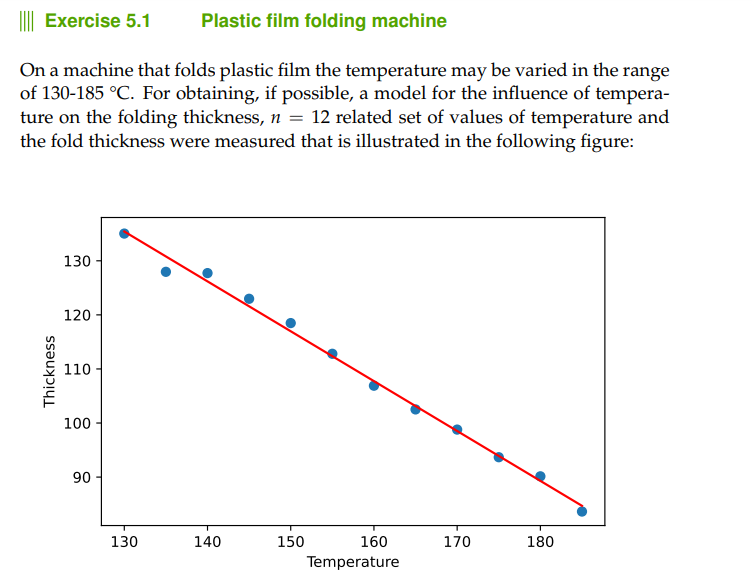

### **a)** Determine by looking at the figure, which of the following sets of estimates for the parameters in the usual regression model is correct:

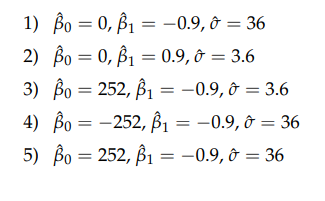

---


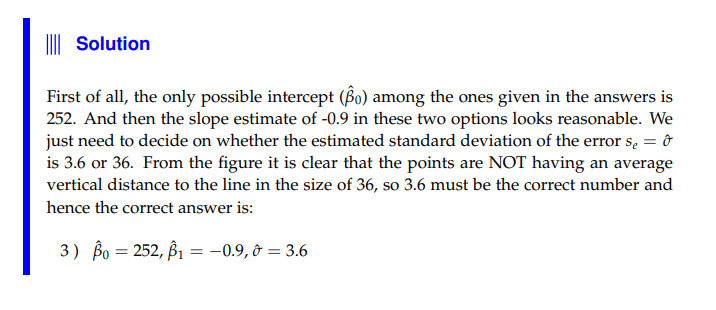


### **b)** What is the only possible correct answer:

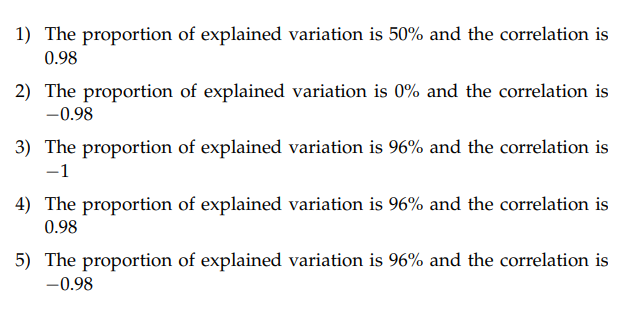

---

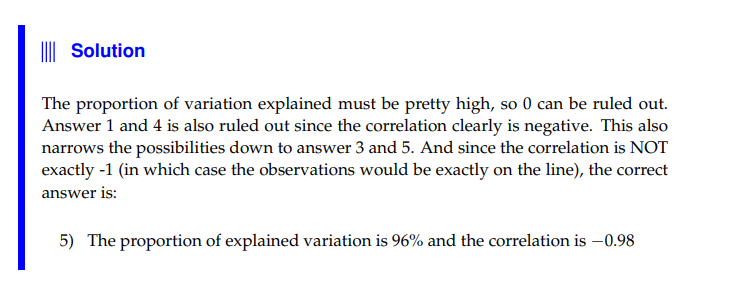

#### **What is proportion of the variablity?** quantifies how well a model explains the variability of the response data around its mean. Essentially, it is a measure of how much of the total variation in the dependent variable can be explained by the independent variable(s) in the model.

### **Determing proportion of variation**: 
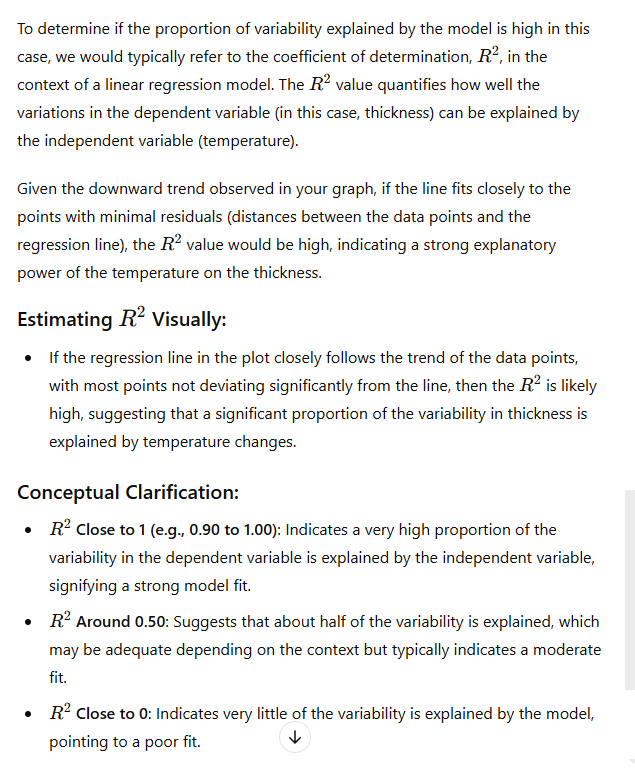

---

## **5.2** Linear regression life time model:

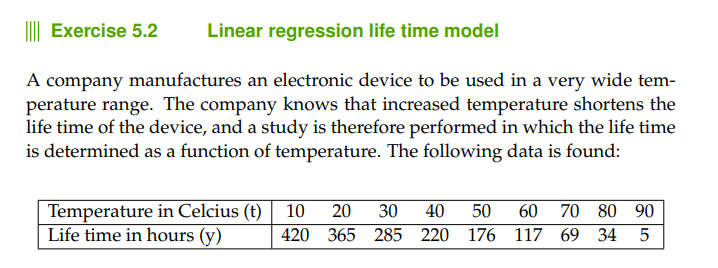

### **a)** Calculate the 95% confidence interval for the slope in the usual linear regression model, which expresses the life time as a linear function of the temperature

---

In [3]:
# data
x = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])             
y = np.array([420, 365, 285, 220, 176, 117, 69, 34, 5]) 

life_time_model = pd.DataFrame({'t': x, 'y': y})
print(life_time_model)

fitLife_time_model = smf.ols(formula = 'y ~ x', data=life_time_model).fit()
print(fitLife_time_model.summary(slim=True))



#fitStudents = smf.ols(formula = 'y ~ x', data=student).fit()  # OBS: use the statsmodels.formula.api library (smf)
#print(fitStudents.summary(slim=True))





    t    y
0  10  420
1  20  365
2  30  285
3  40  220
4  50  176
5  60  117
6  70   69
7  80   34
8  90    5
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
No. Observations:                   9   F-statistic:                     431.5
Covariance Type:            nonrobust   Prob (F-statistic):           1.51e-07
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    453.5556     14.394     31.511      0.000     419.520     487.591
x             -5.3133      0.256    -20.773      0.000      -5.918      -4.709

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


c:\Users\Visnu\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


### So the 95% confidence interval is **[-5.918 -4.709]**

### **More**:

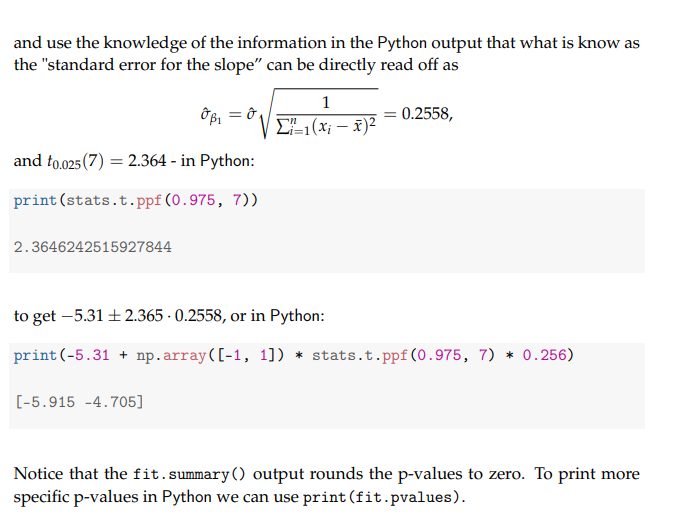

### **b)** Can a relation between temperature and life time be documented on level 5%?

---

In [4]:
# We print the p value

print(fitLife_time_model.pvalues)

Intercept    8.376549e-09
x            1.505039e-07
dtype: float64


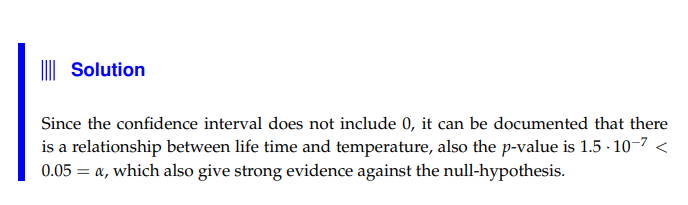

---


## **5.3** Yield of chemical process

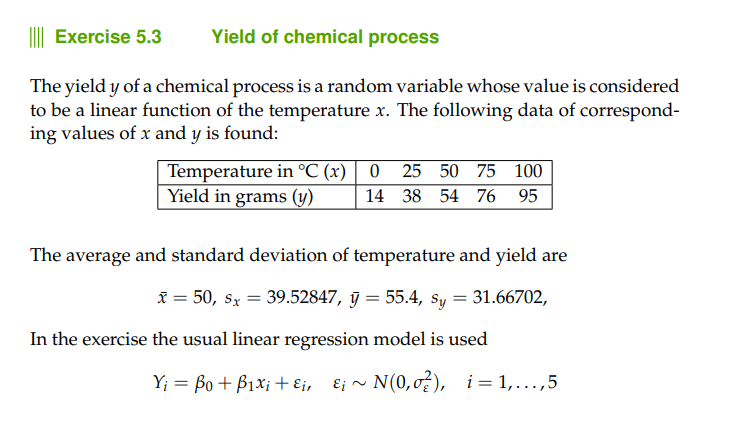

### **a)** Can a significant relationship between yield and temperature be documented on the usual significance level α = 0.05?

---

In [5]:
#x = np.array([0, 25, 50, 75, 100])
#y = np.array( [14, 38, 54, 76, 95])

chemical_process = pd.DataFrame({
    'x': [0, 25, 50, 75, 100],
    'y': [14, 38, 54, 76, 95]
})

print(chemical_process)


     x   y
0    0  14
1   25  38
2   50  54
3   75  76
4  100  95


In [6]:
fit_chemical_process = smf.ols(formula = 'y ~ x', data=chemical_process).fit()
print(fit_chemical_process.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
No. Observations:                   5   F-statistic:                     1071.
Covariance Type:            nonrobust   Prob (F-statistic):           6.27e-05
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.4000      1.497     10.290      0.002      10.637      20.163
x              0.8000      0.024     32.733      0.000       0.722       0.878

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


c:\Users\Visnu\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [7]:
# x here is the p value
print(fit_chemical_process.pvalues)

Intercept    0.001958
x            0.000063
dtype: float64


### The relevant test statistic and p-value can be read off in the Python output as 32.7 and 0.000063. So the answer is:
### **Yes, as the relevant test statistic and p-value are resp. 32.7 and 0.00006 < 0.05 = α.**


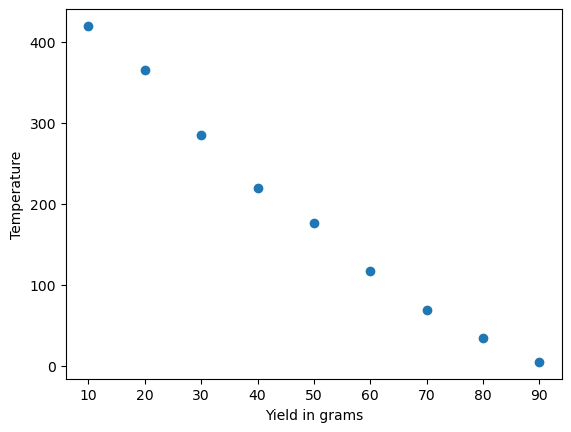

In [8]:
plt.scatter(x,y)
plt.ylabel("Temperature")
plt.xlabel("Yield in grams")
plt.show()

### **b)** Give the 95% confidence interval of the expected yield at a temperature of 
### $ x_{new} = 80 °C.$

---

In [9]:
print(fit_chemical_process.get_prediction(pd.DataFrame({'x': [80]})).summary_frame(alpha=0.05))



   mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0  79.4  1.133255      75.793477      83.006523      72.27132      86.52868


### So the answer is: **[75.79  83.0.1]**

### **c)** What is the upper quartile of the residuals?

---

In [10]:
residuals = fit_chemical_process.resid
print(np.percentile(residuals, 75))




0.5999999999999943


### so the answer is aprrox: **0.6**

---

## **5.4** Plastic material

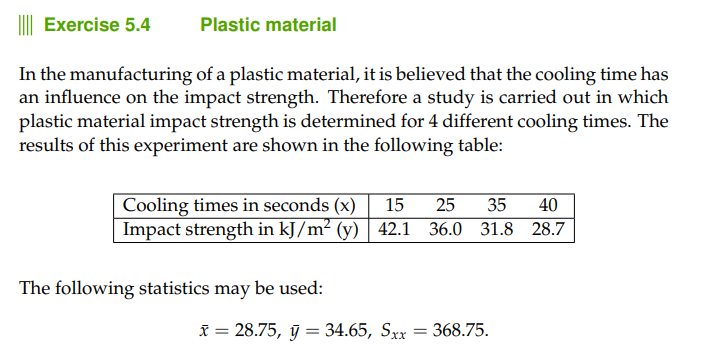


### **a)** What is the 95% confidence interval for the slope of the regression model,expressing the impact strength as a linear function of the cooling time?
---

In [11]:
plastic_material = pd.DataFrame({
    'x': [15, 25, 35, 40],
    'y': [42.1, 36.0, 31.8, 28.7]
})

print(plastic_material)

    x     y
0  15  42.1
1  25  36.0
2  35  31.8
3  40  28.7


In [12]:
fit_plastic_material = smf.ols(formula = 'y ~ x', data=plastic_material).fit()
print(fit_plastic_material.summary(slim=True))



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.991
No. Observations:                   4   F-statistic:                     323.7
Covariance Type:            nonrobust   Prob (F-statistic):            0.00308
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.6390      0.878     56.513      0.000      45.860      53.418
x             -0.5214      0.029    -17.991      0.003      -0.646      -0.397

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


c:\Users\Visnu\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


### So the 95% confidence interval is **[-0.646  -0.397]**

### **b)** Can you conclude that there is a relation between the impact strength and the cooling time at significance level α = 5%?

---

In [13]:
print(fit_plastic_material.pvalues)

Intercept    0.000313
x            0.003075
dtype: float64


### The relevant p-value can be read off directly from the summary output: 0.00308, and we can conclude: **Yes, as the relevant p-value is 0.00308, which is smaller than 0.05**. Again, 0.003 can be read of the summary, but use fit.pvalues for more specific p-values

### **c)** For a similar plastic material the tabulated value for the linear relation between temperature and impact strength (i.e the slope) is −0.30. If the following hypothesis is tested (at level α = 0.05)

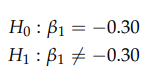

### with the usual t-test statistic for such a test, what is the range (for t) within which the hypothesis is accepted?

---



In [14]:
print(stats.t.ppf(0.025, 2), stats.t.ppf(0.975, 2))

-4.302652729696144 4.302652729696142


### or:

In [15]:


# Given values
beta_1_hat = -0.521  # from previous calculations
beta_1_0 = -0.30 # new
SE_beta_1 = 0.029  # from previous calculations

n = 4  # sample size from previous context
df = n - 2  # degrees of freedom



# Calculate the t-statistic
t_stat = (beta_1_hat - beta_1_0) / SE_beta_1

# Calculate the critical t-value for a 95% confidence, two-tailed test
t_critical = stats.t.ppf(1 - 0.025, df)  # two-tailed

# Calculate the acceptance range
acceptance_range_lower = -t_critical
acceptance_range_upper = t_critical

(t_stat, acceptance_range_lower, acceptance_range_upper)


(-7.620689655172415, -4.302652729696142, 4.302652729696142)

### The so-called critical values for the t-statistic with ν = 2 degrees of freedom is found as (or at least the negative one of the two): t0.025 = −4.303 - in Python: stats.t.ppf(0.975,2)). **So the answer becomes: [−4.303, 4.303].**

---

## **5.5** Water polution

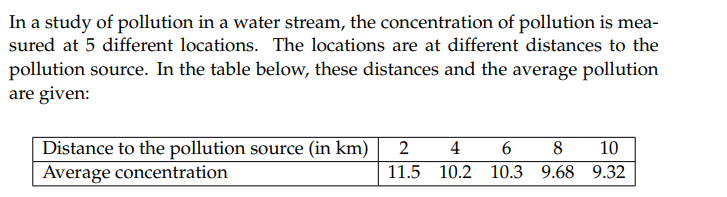

### **a)** What are the parameter estimates for the three unknown parameters in the usual linear regression model: 1) The intercept (β0), 2) the slope (β1) and 3) error standard deviation (σ)?

---

In [16]:
df = pd.DataFrame({
'concentration': [11.5, 10.2, 10.3, 9.68, 9.32],
'distance': [2, 4, 6, 8, 10]
})

fit = smf.ols(formula = 'concentration ~ distance', data=df).fit()
print(fit.summary(slim=True))



                            OLS Regression Results                            
Dep. Variable:          concentration   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.823
No. Observations:                   5   F-statistic:                     19.66
Covariance Type:            nonrobust   Prob (F-statistic):             0.0213
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.6640      0.365     31.955      0.000      10.502      12.826
distance      -0.2440      0.055     -4.434      0.021      -0.419      -0.069

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


c:\Users\Visnu\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


### Given the knowledge of the Python-output structure, the three values can be read off directly from the output. So the correct answer is:

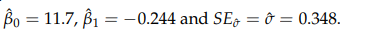


### **b)** How large a part of the variation in concentration can be explained by the distance?
---


### The amount of variation in the model output (Y) explained by the variable input (x) can be found from the squared correlation, that can be read off directly from the output as "R-squared". 

### So the correct answer is: $R^2$ = 86.8% (it is actually an estimate of the variation in concentration which can be explained by distance, since it is what we found with the particular data at hand. 

### If the sample was taken again, then this value would vary. We should actually calculate a confidence interval for $R^2$ to understand how accurate this estimate is!)

### **c)** What is a 95%-confidence interval for the expected pollution concentration 7 km from the pollution source?

---


In [17]:
print(fit.get_prediction(pd.DataFrame({'distance':[7]})).summary_frame(alpha=0.05))


    mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0  9.956  0.165082       9.430636      10.481364      8.730151     11.181849


### So the correct answer is: **9.96 ± 0.525 = [9.43, 10.5]**